In [1]:
import pandas as pd
import numpy as np

PATH = '/home/kai/data/kaggle/homecredit/'
# train = pd.read_csv(PATH + 'application_train.csv')
# print('train')
# test = pd.read_csv(PATH + 'application_test.csv')
# print('test')
bureau = pd.read_csv(PATH + 'bureau.csv')
print('bureau')
# previous_application = pd.read_csv(PATH + 'previous_application.csv')
# print('previous')
# bureau_balance = pd.read_csv(PATH + 'bureau_balance.csv')
# print('bureau_balance')
installments_payments = pd.read_csv(PATH + 'installments_payments.csv')
print('installments_payments done')
# credit_card_balance = pd.read_csv(PATH + 'credit_card_balance.csv')
# print('credit_card_balance')
POS_CASH_balance = pd.read_csv(PATH + 'POS_CASH_balance.csv')
print('POS_CASH_balance')
credit_card_balance = pd.read_csv(PATH + 'credit_card_balance.csv')
print('credit_card_balance')
previous_application = pd.read_csv(PATH + 'previous_application.csv')
print('previous_application')

bureau
installments_payments done
POS_CASH_balance
credit_card_balance
previous_application


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
def replace_outliers_by_percentile(df, col, percentile_val=99, ignoreZero=False):
    r = pd.DataFrame(df[col].copy())
    if ignoreZero:
        percentile = np.nanpercentile(df[df[col].values > 0][col], percentile_val)
    else:
        percentile = np.nanpercentile(df[col], percentile_val)
    r[r.values > percentile] = percentile
    r = r.rename({col:'{}_percentile_replaced'.format(col)}, axis=1)
    return r

In [4]:
def replace_outliers_by_percentile_negative(df, col, percentile_val=1, ignoreZero=False):
    r = pd.DataFrame(df[col].copy())
    if ignoreZero:
        percentile = np.nanpercentile(df[df[col].values < 0][col], percentile_val)
    else:
        percentile = np.nanpercentile(df[col], percentile_val)
    r[r.values < percentile] = percentile
    r = r.rename({col:'{}_percentile_replaced'.format(col)}, axis=1)
    return r

In [4]:
# installments_payments
installments_payments['AMT_PAYMENT'] = replace_outliers_by_percentile(installments_payments, 'AMT_PAYMENT', 99).values
installments_payments['AMT_INSTALMENT'] = replace_outliers_by_percentile(installments_payments, 'AMT_INSTALMENT', 99).values
installments_payments[installments_payments['DAYS_ENTRY_PAYMENT'].values < -3000]['DAYS_ENTRY_PAYMENT'] = -3000

installments_payments.to_pickle(PATH + 'installments_payments_outliers_replaced.pkl')

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys
/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is

In [5]:
# bureau
bureau[bureau['DAYS_ENDDATE_FACT'].values < -3500]['DAYS_ENDDATE_FACT'] = bureau[bureau['DAYS_ENDDATE_FACT'].values > -3500]['DAYS_ENDDATE_FACT'].min()
bureau['AMT_CREDIT_MAX_OVERDUE'] = replace_outliers_by_percentile(bureau, 'AMT_CREDIT_MAX_OVERDUE', 99).values
bureau['AMT_CREDIT_SUM'] = replace_outliers_by_percentile(bureau, 'AMT_CREDIT_SUM', 99).values
bureau[bureau['AMT_CREDIT_SUM_DEBT'].values < 0]['AMT_CREDIT_SUM_DEBT'] = 0
bureau['AMT_CREDIT_SUM_DEBT'] = replace_outliers_by_percentile(bureau, 'AMT_CREDIT_SUM_DEBT', 99).values
bureau[bureau['AMT_CREDIT_SUM_LIMIT'].values < 0]['AMT_CREDIT_SUM_LIMIT'] = 0
bureau['AMT_CREDIT_SUM_LIMIT'] = replace_outliers_by_percentile(bureau, 'AMT_CREDIT_SUM_LIMIT', 99).values
bureau['AMT_CREDIT_SUM_OVERDUE'] = replace_outliers_by_percentile(bureau, 'AMT_CREDIT_SUM_OVERDUE', 99, True).values
bureau['DAYS_CREDIT_UPDATE'] = replace_outliers_by_percentile_negative(bureau, 'DAYS_CREDIT_UPDATE', 1).values
bureau[bureau['DAYS_CREDIT_UPDATE'].values > 0]['DAYS_CREDIT_UPDATE'] = 0
bureau['AMT_ANNUITY'] = replace_outliers_by_percentile(bureau, 'AMT_ANNUITY', 99, True).values

bureau.to_pickle(PATH + 'bureau_outliers_replaced.pkl')

In [ ]:
# credit_card_balance
credit_card_balance['AMT_BALANCE'] = replace_outliers_by_percentile(credit_card_balance, 'AMT_BALANCE', 99, True).values
credit_card_balance['AMT_CREDIT_LIMIT_ACTUAL'] = replace_outliers_by_percentile(credit_card_balance, 'AMT_CREDIT_LIMIT_ACTUAL', 99).values
credit_card_balance['AMT_DRAWINGS_ATM_CURRENT'] = replace_outliers_by_percentile(credit_card_balance, 'AMT_DRAWINGS_ATM_CURRENT', 99, True).values
credit_card_balance['AMT_DRAWINGS_CURRENT'] = replace_outliers_by_percentile(credit_card_balance, 'AMT_DRAWINGS_CURRENT', 99, True).values
credit_card_balance['AMT_DRAWINGS_OTHER_CURRENT'] = replace_outliers_by_percentile(credit_card_balance, 'AMT_DRAWINGS_OTHER_CURRENT', 99, True).values
credit_card_balance['AMT_DRAWINGS_POS_CURRENT'] = replace_outliers_by_percentile(credit_card_balance, 'AMT_DRAWINGS_POS_CURRENT', 99, True).values

credit_card_balance.to_pickle(PATH + 'credit_card_balance_outliers_replaced.pkl')

In [130]:
# POS_CASH_balance
POS_CASH_balance['CNT_INSTALMENT'] = replace_outliers_by_percentile(POS_CASH_balance, 'CNT_INSTALMENT', 99.5)
POS_CASH_balance['CNT_INSTALMENT_FUTURE'] = replace_outliers_by_percentile(POS_CASH_balance, 'CNT_INSTALMENT_FUTURE', 99.5)

POS_CASH_balance.to_pickle(PATH + 'POS_CASH_balance_outliers_replaced.pkl')

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [131]:
# previous_application
previous_application['AMT_ANNUITY'] = replace_outliers_by_percentile(previous_application, 'AMT_ANNUITY', 99.5)
previous_application['AMT_APPLICATION'] = replace_outliers_by_percentile(previous_application, 'AMT_APPLICATION', 99.5)
previous_application['AMT_CREDIT'] = replace_outliers_by_percentile(previous_application, 'AMT_CREDIT', 99.5)
previous_application['AMT_DOWN_PAYMENT'] = replace_outliers_by_percentile(previous_application, 'AMT_DOWN_PAYMENT', 99, True)
previous_application['AMT_GOODS_PRICE'] = replace_outliers_by_percentile(previous_application, 'AMT_GOODS_PRICE', 99.5)
previous_application['RATE_DOWN_PAYMENT'] = replace_outliers_by_percentile(previous_application, 'RATE_DOWN_PAYMENT', 99.5)
previous_application['CNT_PAYMENT'] = replace_outliers_by_percentile(previous_application, 'CNT_PAYMENT', 99.5)

previous_application.to_pickle(PATH + 'previous_application_outliers_replaced.pkl')

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


In [34]:
# credit_card_balance[credit_card_balance['AMT_BALANCE'].values >= np.nanpercentile(credit_card_balance[credit_card_balance['AMT_BALANCE'].values > 0]['AMT_BALANCE'].values, 99)]

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


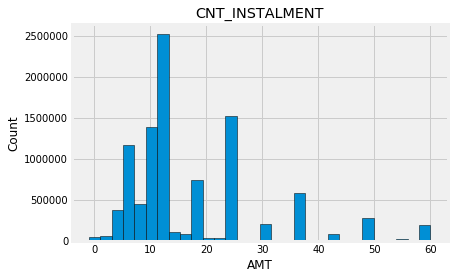

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


(11476      61.0
 14383      61.0
 14528      61.0
 14919      61.0
 16189      61.0
 16263      61.0
 17426      61.0
 17714      61.0
 17897      61.0
 18064      61.0
 18145      61.0
 19266      61.0
 22017      61.0
 23776      61.0
 26074      61.0
 27019      61.0
 27686      61.0
 29930      61.0
 34804      61.0
 36426      61.0
 37525      61.0
 37870      61.0
 38631      61.0
 40420      66.0
 40833      61.0
 45970      61.0
 55594      61.0
 57257      61.0
 57984      61.0
 58268      61.0
            ... 
 9888524    72.0
 9898099    72.0
 9901026    72.0
 9901432    68.0
 9901435    72.0
 9902787    72.0
 9902795    72.0
 9902802    72.0
 9902811    72.0
 9902824    72.0
 9903221    72.0
 9911505    61.0
 9925360    72.0
 9925363    72.0
 9926745    72.0
 9926763    72.0
 9929398    66.0
 9929603    66.0
 9929786    66.0
 9930407    66.0
 9932016    66.0
 9932133    66.0
 9939205    72.0
 9966959    72.0
 9967090    72.0
 9967096    72.0
 9967476    72.0
 9968183    72

In [16]:
# temp = POS_CASH_balance.copy()
# temp['CNT_INSTALMENT'] = temp['CNT_INSTALMENT'].fillna(-999)
# temp = temp[temp['CNT_INSTALMENT'].values >= 0]

temp = replace_outliers_by_percentile(POS_CASH_balance, 'CNT_INSTALMENT', 99.5)

plt.hist(temp['CNT_INSTALMENT_percentile_replaced'].fillna(-1), edgecolor = 'k', bins = 30)
plt.title('CNT_INSTALMENT'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()
POS_CASH_balance[POS_CASH_balance['CNT_INSTALMENT'].values > 60]['CNT_INSTALMENT'], temp[temp['CNT_INSTALMENT_percentile_replaced'].values >55]

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


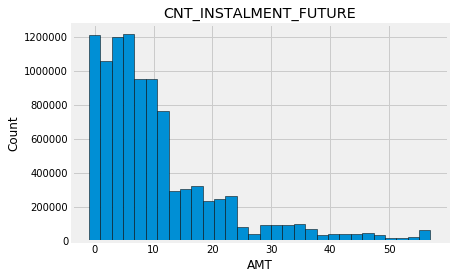

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


(20         56.0
 381        54.0
 1467       53.0
 1669       54.0
 2567       53.0
 3241       58.0
 3304       53.0
 3735       51.0
 3746       52.0
 3864       54.0
 3870       55.0
 3893       51.0
 3906       52.0
 3910       55.0
 4449       59.0
 4456       57.0
 4461       51.0
 4484       57.0
 4637       60.0
 4638       60.0
 4649       55.0
 4852       54.0
 5049       60.0
 5054       54.0
 5056       57.0
 5061       60.0
 5066       54.0
 5077       54.0
 5152       53.0
 5228       51.0
            ... 
 9985399    60.0
 9985400    60.0
 9985402    56.0
 9985408    55.0
 9985410    60.0
 9985413    58.0
 9985420    53.0
 9985424    55.0
 9985425    59.0
 9985426    59.0
 9985563    53.0
 9985572    53.0
 9985573    53.0
 9985574    57.0
 9985579    51.0
 9985582    53.0
 9985584    55.0
 9985591    54.0
 9985593    53.0
 9985597    54.0
 9985599    56.0
 9985602    59.0
 9985603    54.0
 9985604    54.0
 9985607    54.0
 9985608    54.0
 9985609    57.0
 9985611    59

In [27]:
# temp = POS_CASH_balance.copy()
# temp['CNT_INSTALMENT'] = temp['CNT_INSTALMENT'].fillna(-999)
# temp = temp[temp['CNT_INSTALMENT'].values >= 0]

temp = replace_outliers_by_percentile(POS_CASH_balance, 'CNT_INSTALMENT_FUTURE', 99.5)

plt.hist(temp['CNT_INSTALMENT_FUTURE_percentile_replaced'].fillna(-1), edgecolor = 'k', bins = 30)
plt.title('CNT_INSTALMENT_FUTURE'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()
POS_CASH_balance[POS_CASH_balance['CNT_INSTALMENT_FUTURE'].values > 50]['CNT_INSTALMENT_FUTURE'], temp[temp['CNT_INSTALMENT_FUTURE_percentile_replaced'].values > 50]

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


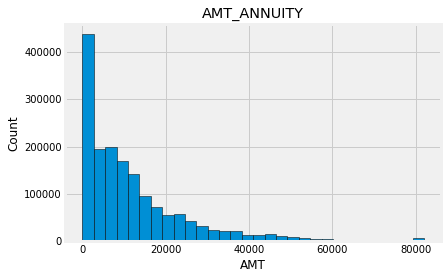

In [33]:
temp = replace_outliers_by_percentile(previous_application, 'AMT_ANNUITY', 99.5)

plt.hist(temp['AMT_ANNUITY_percentile_replaced'].fillna(-1), edgecolor = 'k', bins = 30)
plt.title('AMT_ANNUITY'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()
# previous_application[previous_application['AMT_ANNUITY'].values > 50]['AMT_ANNUITY'], temp[temp['AMT_ANNUITY_percentile_replaced'].values > 50]

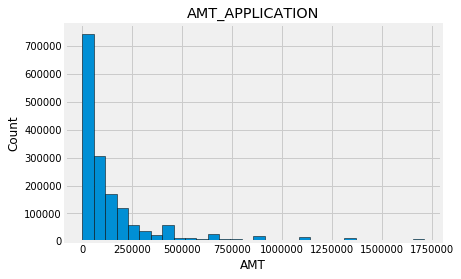

In [37]:
temp = replace_outliers_by_percentile(previous_application, 'AMT_APPLICATION', 99.5)

plt.hist(temp['AMT_APPLICATION_percentile_replaced'].fillna(-100), edgecolor = 'k', bins = 30)
plt.title('AMT_APPLICATION'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()
# previous_application[previous_application['AMT_ANNUITY'].values > 50]['AMT_ANNUITY'], temp[temp['AMT_ANNUITY_percentile_replaced'].values > 50]

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


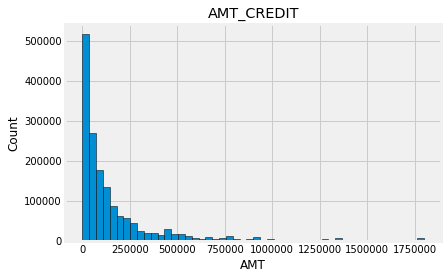

In [46]:
temp = replace_outliers_by_percentile(previous_application, 'AMT_CREDIT', 99.5)

plt.hist(temp['AMT_CREDIT_percentile_replaced'].fillna(-100), edgecolor = 'k', bins = 50)
plt.title('AMT_CREDIT'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()
# previous_application[previous_application['AMT_ANNUITY'].values > 50]['AMT_ANNUITY'], temp[temp['AMT_ANNUITY_percentile_replaced'].values > 50]

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


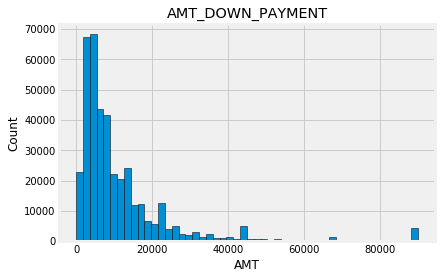

In [65]:
temp = replace_outliers_by_percentile(previous_application, 'AMT_DOWN_PAYMENT', 99, True).fillna(-100)
temp = temp[temp['AMT_DOWN_PAYMENT_percentile_replaced'].values > 0]

plt.hist(temp['AMT_DOWN_PAYMENT_percentile_replaced'], edgecolor = 'k', bins = 50)
plt.title('AMT_DOWN_PAYMENT'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()
# previous_application[previous_application['AMT_DOWN_PAYMENT'].values > 120000]['AMT_DOWN_PAYMENT'], temp[temp['AMT_DOWN_PAYMENT_percentile_replaced'].values > 80000]

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


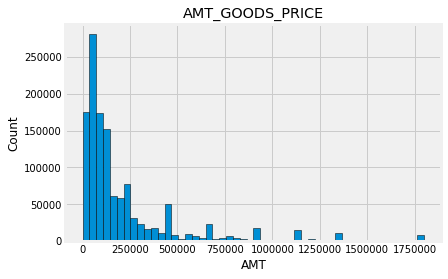

In [72]:
temp = replace_outliers_by_percentile(previous_application, 'AMT_GOODS_PRICE', 99.5).fillna(-100)
temp = temp[temp['AMT_GOODS_PRICE_percentile_replaced'].values >= 0]

plt.hist(temp['AMT_GOODS_PRICE_percentile_replaced'], edgecolor = 'k', bins = 50)
plt.title('AMT_GOODS_PRICE'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()
# previous_application[previous_application['AMT_DOWN_PAYMENT'].values > 120000]['AMT_DOWN_PAYMENT'], temp[temp['AMT_DOWN_PAYMENT_percentile_replaced'].values > 80000]

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


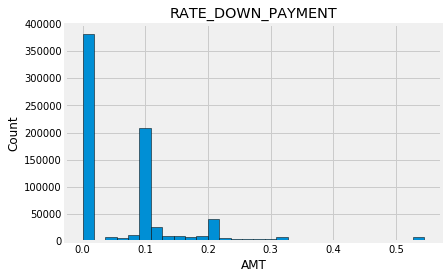

(120        0.530538
 183        0.695678
 721        0.544545
 738        0.605084
 803        0.592495
 817        0.538519
 967        0.533100
 1179       0.534556
 1311       0.535132
 1408       0.544552
 1576       0.544545
 1664       0.550825
 1729       0.530542
 1889       0.509850
 2030       0.818315
 2789       0.544545
 2823       0.611355
 2906       0.630115
 3233       0.579890
 3480       0.560809
 3531       0.549713
 3606       0.541190
 3641       0.511636
 3791       0.533967
 4132       0.648442
 4158       0.521589
 4192       0.526567
 4349       0.528890
 4350       0.500042
 4463       0.675734
              ...   
 1662486    0.604117
 1662488    0.530556
 1662543    0.535129
 1662685    0.540045
 1662692    0.500899
 1662870    0.514054
 1663303    0.752980
 1663673    0.530534
 1663958    0.517230
 1664486    0.530875
 1664656    0.683409
 1664769    0.562033
 1664923    0.544545
 1665576    0.572703
 1665916    0.544545
 1666100    0.530568
 1666176    0

In [80]:
temp = replace_outliers_by_percentile(previous_application, 'RATE_DOWN_PAYMENT', 99.5).fillna(-100)
temp = temp[temp['RATE_DOWN_PAYMENT_percentile_replaced'].values >= 0]

plt.hist(temp['RATE_DOWN_PAYMENT_percentile_replaced'], edgecolor = 'k', bins = 30)
plt.title('RATE_DOWN_PAYMENT'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()
previous_application[previous_application['RATE_DOWN_PAYMENT'].values > .5]['RATE_DOWN_PAYMENT'], temp[temp['RATE_DOWN_PAYMENT_percentile_replaced'].values > .5]

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


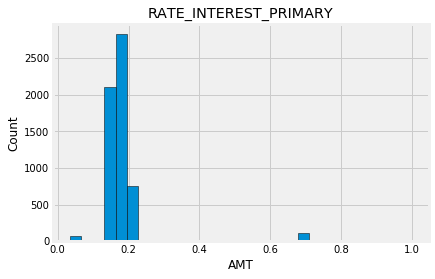

In [89]:
temp = replace_outliers_by_percentile(previous_application, 'RATE_INTEREST_PRIMARY', 100).fillna(-100)
temp = temp[temp['RATE_INTEREST_PRIMARY_percentile_replaced'].values >= 0]

plt.hist(temp['RATE_INTEREST_PRIMARY_percentile_replaced'], edgecolor = 'k', bins = 30)
plt.title('RATE_INTEREST_PRIMARY'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()
# previous_application[previous_application['RATE_DOWN_PAYMENT'].values > .5]['RATE_DOWN_PAYMENT'], temp[temp['RATE_DOWN_PAYMENT_percentile_replaced'].values > .5]

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


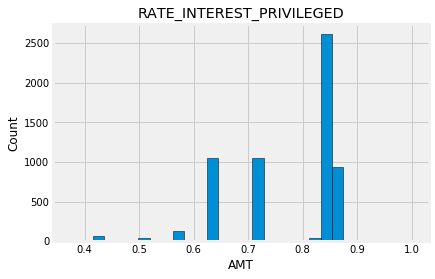

In [90]:
temp = replace_outliers_by_percentile(previous_application, 'RATE_INTEREST_PRIVILEGED', 100).fillna(-100)
temp = temp[temp['RATE_INTEREST_PRIVILEGED_percentile_replaced'].values >= 0]

plt.hist(temp['RATE_INTEREST_PRIVILEGED_percentile_replaced'], edgecolor = 'k', bins = 30)
plt.title('RATE_INTEREST_PRIVILEGED'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()
# previous_application[previous_application['RATE_DOWN_PAYMENT'].values > .5]['RATE_DOWN_PAYMENT'], temp[temp['RATE_DOWN_PAYMENT_percentile_replaced'].values > .5]

In [91]:
priv_id = set(previous_application[previous_application['RATE_INTEREST_PRIVILEGED'].isnull() == 0]['SK_ID_CURR'])
prim_id = set(previous_application[previous_application['RATE_INTEREST_PRIMARY'].isnull() == 0]['SK_ID_CURR'])
inter = priv_id & prim_id

priv_id.__len__(), prim_id.__len__(), inter.__len__()

(5721, 5721, 5721)

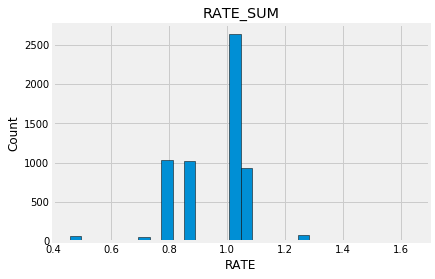

In [96]:
temp = previous_application['RATE_INTEREST_PRIVILEGED'] + previous_application['RATE_INTEREST_PRIMARY']
temp = temp[temp.isnull() == 0]

plt.hist(temp.values, edgecolor = 'k', bins = 30)
plt.title('RATE_SUM'); plt.xlabel('RATE'); plt.ylabel('Count');
plt.show()

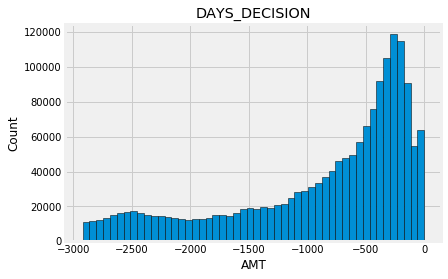

In [111]:
temp = replace_outliers_by_percentile_negative(previous_application, 'DAYS_DECISION', 0).fillna(100)
temp = temp[temp['DAYS_DECISION_percentile_replaced'].values <= 0]

plt.hist(temp['DAYS_DECISION_percentile_replaced'], edgecolor = 'k', bins = 50)
plt.title('DAYS_DECISION'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()
# previous_application[previous_application['DAYS_DECISION'].values < -2900]['DAYS_DECISION'], temp[temp['DAYS_DECISION_percentile_replaced'].values > .5]

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


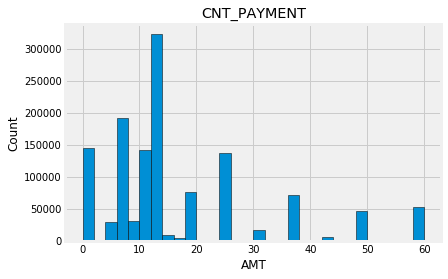

In [119]:
temp = replace_outliers_by_percentile(previous_application, 'CNT_PAYMENT', 99.5).fillna(-100)
temp = temp[temp['CNT_PAYMENT_percentile_replaced'].values >= 0]

plt.hist(temp['CNT_PAYMENT_percentile_replaced'], edgecolor = 'k', bins = 30)
plt.title('CNT_PAYMENT'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()
# previous_application[previous_application['CNT_PAYMENT'].values > 60]['CNT_PAYMENT'], temp[temp['CNT_PAYMENT_percentile_replaced'].values > 60]

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


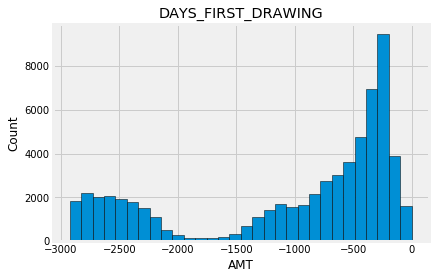

In [123]:
temp = replace_outliers_by_percentile_negative(previous_application, 'DAYS_FIRST_DRAWING', 0).fillna(100)
temp = temp[temp['DAYS_FIRST_DRAWING_percentile_replaced'].values <= 0]

plt.hist(temp['DAYS_FIRST_DRAWING_percentile_replaced'], edgecolor = 'k', bins = 30)
plt.title('DAYS_FIRST_DRAWING'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()
# previous_application[previous_application['CNT_PAYMENT'].values > 60]['CNT_PAYMENT'], temp[temp['CNT_PAYMENT_percentile_replaced'].values > 60]

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


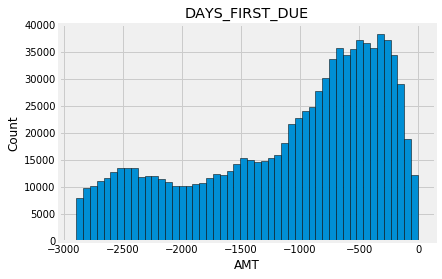

In [125]:
temp = replace_outliers_by_percentile_negative(previous_application, 'DAYS_FIRST_DUE', 0).fillna(100)
temp = temp[temp['DAYS_FIRST_DUE_percentile_replaced'].values <= 0]

plt.hist(temp['DAYS_FIRST_DUE_percentile_replaced'], edgecolor = 'k', bins = 50)
plt.title('DAYS_FIRST_DUE'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()
# previous_application[previous_application['CNT_PAYMENT'].values > 60]['CNT_PAYMENT'], temp[temp['CNT_PAYMENT_percentile_replaced'].values > 60]

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


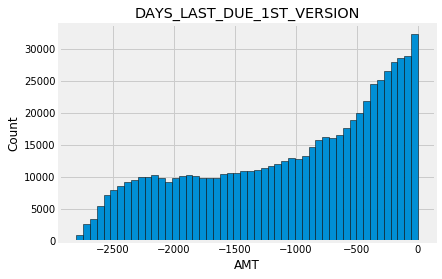

In [126]:
temp = replace_outliers_by_percentile_negative(previous_application, 'DAYS_LAST_DUE_1ST_VERSION', 0).fillna(100)
temp = temp[temp['DAYS_LAST_DUE_1ST_VERSION_percentile_replaced'].values <= 0]

plt.hist(temp['DAYS_LAST_DUE_1ST_VERSION_percentile_replaced'], edgecolor = 'k', bins = 50)
plt.title('DAYS_LAST_DUE_1ST_VERSION'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()
# previous_application[previous_application['CNT_PAYMENT'].values > 60]['CNT_PAYMENT'], temp[temp['CNT_PAYMENT_percentile_replaced'].values > 60]

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


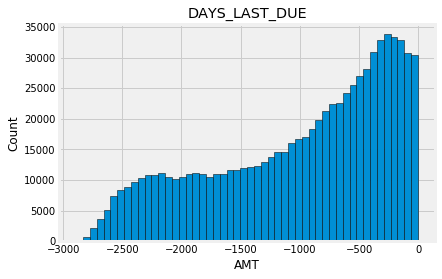

In [127]:
temp = replace_outliers_by_percentile_negative(previous_application, 'DAYS_LAST_DUE', 0).fillna(100)
temp = temp[temp['DAYS_LAST_DUE_percentile_replaced'].values <= 0]

plt.hist(temp['DAYS_LAST_DUE_percentile_replaced'], edgecolor = 'k', bins = 50)
plt.title('DAYS_LAST_DUE'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()
# previous_application[previous_application['CNT_PAYMENT'].values > 60]['CNT_PAYMENT'], temp[temp['CNT_PAYMENT_percentile_replaced'].values > 60]

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


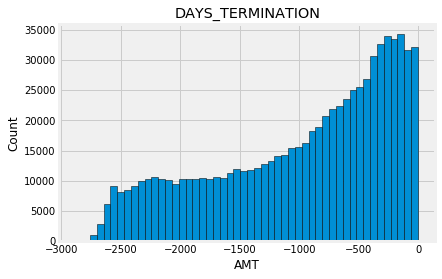

(551       -2707.0
 554       -2724.0
 3166      -2725.0
 7555      -2726.0
 8262      -2706.0
 9033      -2760.0
 10391     -2704.0
 11914     -2733.0
 12461     -2714.0
 12584     -2747.0
 12687     -2789.0
 13063     -2721.0
 14785     -2787.0
 14991     -2742.0
 16724     -2701.0
 16896     -2717.0
 17853     -2706.0
 18131     -2703.0
 19602     -2705.0
 24329     -2731.0
 25300     -2742.0
 27199     -2759.0
 27645     -2784.0
 27853     -2780.0
 27881     -2712.0
 28200     -2769.0
 28362     -2775.0
 28462     -2807.0
 30447     -2763.0
 32017     -2844.0
             ...  
 1639201   -2760.0
 1639942   -2754.0
 1646215   -2755.0
 1646277   -2790.0
 1646278   -2759.0
 1647107   -2710.0
 1647142   -2704.0
 1647760   -2734.0
 1648039   -2782.0
 1648374   -2712.0
 1648943   -2784.0
 1652124   -2705.0
 1654188   -2704.0
 1656107   -2717.0
 1658057   -2703.0
 1658296   -2704.0
 1659087   -2750.0
 1659377   -2704.0
 1660057   -2704.0
 1661086   -2701.0
 1661786   -2701.0
 1663745   -

In [129]:
temp = replace_outliers_by_percentile_negative(previous_application, 'DAYS_TERMINATION', 0).fillna(100)
temp = temp[temp['DAYS_TERMINATION_percentile_replaced'].values <= 0]

plt.hist(temp['DAYS_TERMINATION_percentile_replaced'], edgecolor = 'k', bins = 50)
plt.title('DAYS_TERMINATION'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()
# previous_application[previous_application['DAYS_TERMINATION'].values < -2700]['DAYS_TERMINATION'], temp[temp['DAYS_TERMINATION_percentile_replaced'].values > 60]

In [2]:
df = train.copy()

In [13]:
temp = pd.merge(df, previous_application, on='SK_ID_CURR')

In [17]:
approved = temp[temp['NAME_CONTRACT_STATUS'].values == 'Approved']
approved_0 = approved[approved['TARGET']==0]
approved_1 = approved[approved['TARGET']==1]

not_approved = temp[temp['NAME_CONTRACT_STATUS'].values == 'Refused']
not_approved_0 = not_approved[not_approved['TARGET']==0]
not_approved_1 = not_approved[not_approved['TARGET']==1]

print('0 in approved:{}'.format(approved_0.shape[0]/approved.shape[0]))
print('1 in approved:{}'.format(approved_1.shape[0]/approved.shape[0]))
print('0 in not approved:{}'.format(not_approved_0.shape[0]/not_approved.shape[0]))
print('1 in not approved:{}'.format(not_approved_1.shape[0]/not_approved.shape[0]))

0 in approved:0.9241134455630804
1 in approved:0.07588655443691958
0 in not approved:0.8800358612820408
1 in not approved:0.11996413871795916


In [13]:
curr_id_installment = set(installments_payments['SK_ID_CURR'].values)
curr_id_0 = set(df[df['TARGET'] == 0]['SK_ID_CURR'].values)
curr_id_1 = set(df[df['TARGET'] == 1]['SK_ID_CURR'].values)

curr_id_installment_0 = curr_id_installment & curr_id_0
curr_id_installment_1 = curr_id_installment & curr_id_1

In [16]:
curr_id_installment_0.__len__(), curr_id_installment_1.__len__(), curr_id_installment.__len__()

(267767, 23876, 339587)

In [18]:
count = curr_id_installment_0.__len__() + curr_id_installment_1.__len__()
print('0 in inst: {}'.format(curr_id_installment_0.__len__()/count))
print('1 in inst: {}'.format(curr_id_installment_1.__len__()/count))

0 in inst: 0.9181327856317484
1 in inst: 0.08186721436825159


In [3]:
curr_id_pos_cash = set(POS_CASH_balance['SK_ID_CURR'].values)
curr_id_credit_card_balance = set(credit_card_balance['SK_ID_CURR'].values)

curr_id_0 = set(df[df['TARGET'] == 0]['SK_ID_CURR'].values)
curr_id_1 = set(df[df['TARGET'] == 1]['SK_ID_CURR'].values)

curr_id_pos_cash_0 = curr_id_pos_cash & curr_id_0
curr_id_pos_cash_1 = curr_id_pos_cash & curr_id_1

curr_id_credit_card_balance_0 = curr_id_credit_card_balance & curr_id_0
curr_id_credit_card_balance_1 = curr_id_credit_card_balance & curr_id_1

In [4]:
count_pos = curr_id_pos_cash_0.__len__() + curr_id_pos_cash_1.__len__()
count_credit = curr_id_credit_card_balance_0.__len__() + curr_id_credit_card_balance_1.__len__()

In [5]:
print('0 in pos: {}'.format(curr_id_pos_cash_0.__len__()/count_pos))
print('1 in pos: {}'.format(curr_id_pos_cash_1.__len__()/count_pos))

0 in pos: 0.918391813269579
1 in pos: 0.08160818673042108


In [7]:
print('0 in credit: {}'.format(curr_id_credit_card_balance_0.__len__()/count_credit))
print('1 in credit: {}'.format(curr_id_credit_card_balance_1.__len__()/count_credit))

0 in credit: 0.9133076347736033
1 in credit: 0.08669236522639664


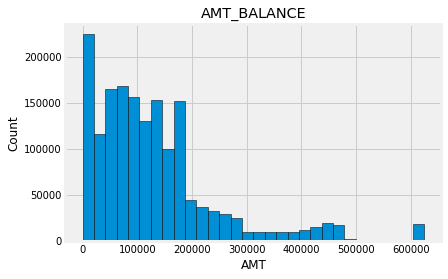

0.0006106274698514079

In [15]:


temp = replace_outliers_by_percentile(credit_card_balance, 'AMT_BALANCE', 99, True)

temp[temp['AMT_BALANCE_percentile_replaced'].values < 0] = 0

temp = temp[temp['AMT_BALANCE_percentile_replaced'].values > 0] 
# Plot the distribution of ages in years
plt.hist(temp['AMT_BALANCE_percentile_replaced'], edgecolor = 'k', bins = 30)
plt.title('AMT_BALANCE'); plt.xlabel('AMT'); plt.ylabel('Count');

plt.show()

credit_card_balance[credit_card_balance['AMT_BALANCE'].values < 0].shape[0]/credit_card_balance.shape[0]

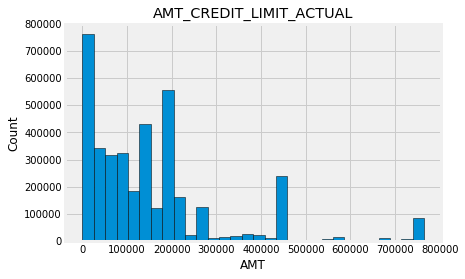

In [24]:
# temp = credit_card_balance[credit_card_balance['AMT_CREDIT_LIMIT_ACTUAL'].values >= 0]
# temp = temp[temp['AMT_CREDIT_LIMIT_ACTUAL'].values > 900000]

temp = replace_outliers_by_percentile(credit_card_balance, 'AMT_CREDIT_LIMIT_ACTUAL', 99)


plt.hist(temp['AMT_CREDIT_LIMIT_ACTUAL_percentile_replaced'], edgecolor = 'k', bins = 30)
plt.title('AMT_CREDIT_LIMIT_ACTUAL'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()

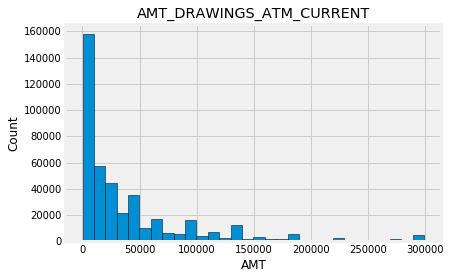

In [30]:
temp = credit_card_balance.copy()
temp['AMT_DRAWINGS_ATM_CURRENT'] = temp['AMT_DRAWINGS_ATM_CURRENT'].fillna(-999)
temp = temp[temp['AMT_DRAWINGS_ATM_CURRENT'].values > 0]
# temp = temp[temp['AMT_DRAWINGS_ATM_CURRENT'].values < 300000]
temp = replace_outliers_by_percentile(temp, 'AMT_DRAWINGS_ATM_CURRENT', 99)

plt.hist(temp['AMT_DRAWINGS_ATM_CURRENT_percentile_replaced'], edgecolor = 'k', bins = 30)
plt.title('AMT_DRAWINGS_ATM_CURRENT'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()

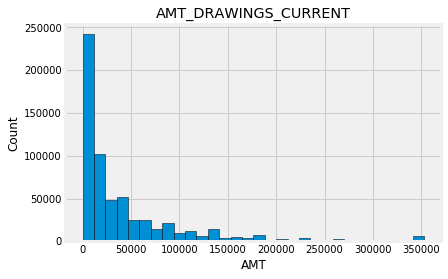

In [39]:
temp = credit_card_balance.copy()
temp['AMT_DRAWINGS_CURRENT'] = temp['AMT_DRAWINGS_CURRENT'].fillna(-999)
temp = temp[temp['AMT_DRAWINGS_CURRENT'].values > 0]
# temp = temp[temp['AMT_DRAWINGS_CURRENT'].values < 200000]
temp = replace_outliers_by_percentile(temp, 'AMT_DRAWINGS_CURRENT', 99)


plt.hist(temp['AMT_DRAWINGS_CURRENT_percentile_replaced'], edgecolor = 'k', bins = 30)
plt.title('AMT_DRAWINGS_CURRENT'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()

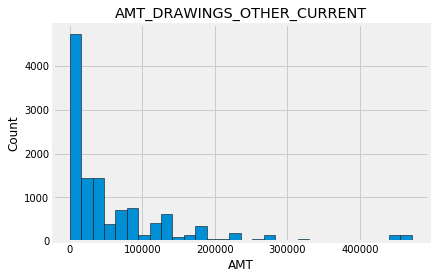

In [43]:
temp = credit_card_balance.copy()
temp['AMT_DRAWINGS_OTHER_CURRENT'] = temp['AMT_DRAWINGS_OTHER_CURRENT'].fillna(-999)
temp = temp[temp['AMT_DRAWINGS_OTHER_CURRENT'].values > 0]
# temp = temp[temp['AMT_DRAWINGS_OTHER_CURRENT'].values < 200000]

temp = replace_outliers_by_percentile(temp, 'AMT_DRAWINGS_OTHER_CURRENT', 99)

plt.hist(temp['AMT_DRAWINGS_OTHER_CURRENT_percentile_replaced'], edgecolor = 'k', bins = 30)
plt.title('AMT_DRAWINGS_OTHER_CURRENT'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()

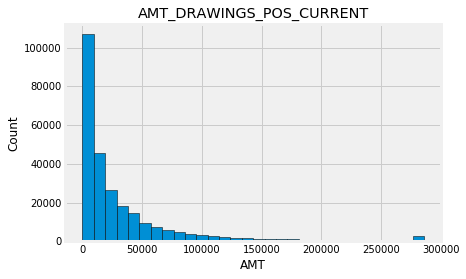

In [47]:
temp = credit_card_balance.copy()
temp['AMT_DRAWINGS_POS_CURRENT'] = temp['AMT_DRAWINGS_POS_CURRENT'].fillna(-999)
temp = temp[temp['AMT_DRAWINGS_POS_CURRENT'].values > 0]
# temp = temp[temp['AMT_DRAWINGS_POS_CURRENT'].values < 150000]

temp = replace_outliers_by_percentile(temp, 'AMT_DRAWINGS_POS_CURRENT', 99)


plt.hist(temp['AMT_DRAWINGS_POS_CURRENT_percentile_replaced'], edgecolor = 'k', bins = 30)
plt.title('AMT_DRAWINGS_POS_CURRENT'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()

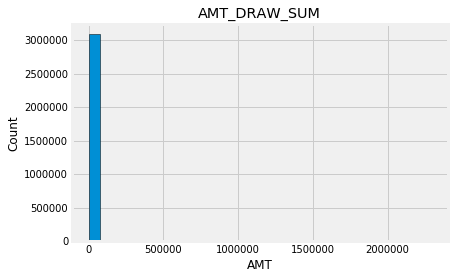

0

In [31]:
temp = credit_card_balance.copy()
temp['AMT_DRAWINGS_POS_CURRENT'] = temp['AMT_DRAWINGS_POS_CURRENT'].fillna(-999)
temp = temp[temp['AMT_DRAWINGS_POS_CURRENT'].values >= 0]
temp['AMT_DRAWINGS_OTHER_CURRENT'] = temp['AMT_DRAWINGS_OTHER_CURRENT'].fillna(-999)
temp = temp[temp['AMT_DRAWINGS_OTHER_CURRENT'].values >= 0]
temp['AMT_DRAWINGS_ATM_CURRENT'] = temp['AMT_DRAWINGS_ATM_CURRENT'].fillna(-999)
temp = temp[temp['AMT_DRAWINGS_ATM_CURRENT'].values >= 0]
temp['AMT_DRAWINGS_CURRENT'] = temp['AMT_DRAWINGS_CURRENT'].fillna(-999)
temp = temp[temp['AMT_DRAWINGS_CURRENT'].values >= 0]
temp = temp[temp['AMT_BALANCE'].values >= 0]

temp2 = (temp['AMT_DRAWINGS_CURRENT']-(temp['AMT_DRAWINGS_ATM_CURRENT']+temp['AMT_DRAWINGS_OTHER_CURRENT']+temp['AMT_DRAWINGS_POS_CURRENT']))

plt.hist(temp2, edgecolor = 'k', bins = 30)
plt.title('AMT_DRAW_SUM'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()

In [7]:
temp = previous_application.copy()

temp2 = temp[temp['NAME_CONTRACT_STATUS'].values == 'Approved']

temp2['DAYS_TERMINATION'].isnull().sum(), previous_application['DAYS_TERMINATION'].isnull().sum()

(39632, 673065)

In [6]:
temp = previous_application.copy()

temp2 = temp[temp['NAME_CONTRACT_STATUS'].values == 'Approved']

previous_application['NFLAG_INSURED_ON_APPROVAL'].isnull().sum()

673065

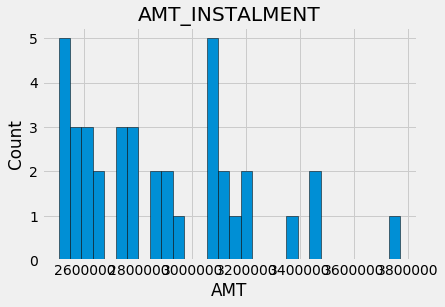

237456      2544233.895
803013      2784334.140
860189      3473582.895
999372      2584615.410
1515439     2507880.825
1546640     3065242.455
1649354     2912741.640
1745443     2541938.265
1854253     2620989.180
2190732     3071320.785
3032341     2733612.840
3366817     3371884.155
3493730     3071837.565
3595373     2949993.540
3699714     2786580.270
4455742     3771487.845
5109573     2742996.375
5221576     2898692.370
5248466     3066270.705
5336871     2558800.530
5426815     2874948.840
6364485     3150949.545
6554802     2533614.615
6658683     2627296.110
6986907     3436835.130
7078715     3110086.215
7214927     2630908.935
7312218     3199045.365
8207133     3116440.260
9119046     3202061.805
9355285     3094108.245
10331676    2744389.980
11311573    2554855.245
11673104    2798275.680
12730671    2860377.165
12966495    2639214.450
13130397    2504589.660
13447389    2651198.130
Name: AMT_INSTALMENT, dtype: float64

In [34]:
temp = installments_payments.copy()

temp = temp[temp['AMT_INSTALMENT'].values > 2500000]


plt.hist(temp['AMT_INSTALMENT'], edgecolor = 'k', bins = 30)
plt.title('AMT_INSTALMENT'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()
installments_payments[installments_payments['AMT_INSTALMENT'].values > 2500000]['AMT_INSTALMENT']

In [25]:
inst_id = set(installments_payments[installments_payments['AMT_INSTALMENT'].values > np.nanpercentile(installments_payments['AMT_INSTALMENT'].values, 99)]['SK_ID_CURR'].values)
pay_id = set(installments_payments[installments_payments['AMT_PAYMENT'].values > np.nanpercentile(installments_payments['AMT_PAYMENT'].values, 99)]['SK_ID_CURR'].values)
res = inst_id & pay_id

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [26]:
inst_id.__len__(), pay_id.__len__(), res.__len__()

(79633, 70885, 70667)

6804

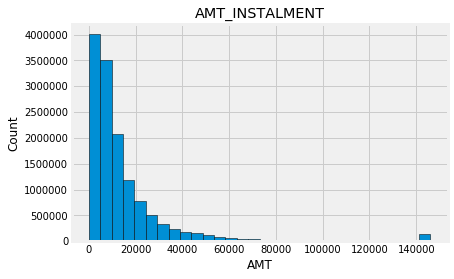

In [24]:
temp = installments_payments.copy()

'''temp = temp[temp['AMT_INSTALMENT'].values > 2500000]'''

temp2 = replace_outliers_by_percentile(installments_payments, 'AMT_INSTALMENT')

plt.hist(temp2['AMT_INSTALMENT_percentile_replaced'] , edgecolor = 'k', bins = 30)
plt.title('AMT_INSTALMENT'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()

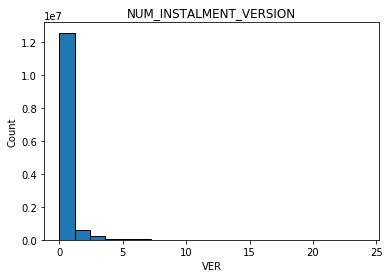

In [27]:
temp = installments_payments.copy()

temp = temp[temp['NUM_INSTALMENT_VERSION'].values < 25]

plt.hist(temp['NUM_INSTALMENT_VERSION'], edgecolor = 'k', bins = 20)
plt.title('NUM_INSTALMENT_VERSION'); plt.xlabel('VER'); plt.ylabel('Count');
plt.show()

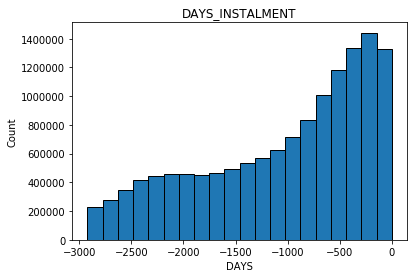

In [28]:
temp = installments_payments.copy()



plt.hist(temp['DAYS_INSTALMENT'], edgecolor = 'k', bins = 20)
plt.title('DAYS_INSTALMENT'); plt.xlabel('DAYS'); plt.ylabel('Count');
plt.show()

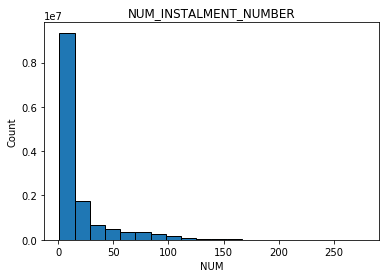

In [71]:
temp = installments_payments.copy()

'''temp = temp[temp['NUM_INSTALMENT_NUMBER'].values < 200]'''


plt.hist(temp['NUM_INSTALMENT_NUMBER'], edgecolor = 'k', bins = 20)
plt.title('NUM_INSTALMENT_NUMBER'); plt.xlabel('NUM'); plt.ylabel('Count');
plt.show()

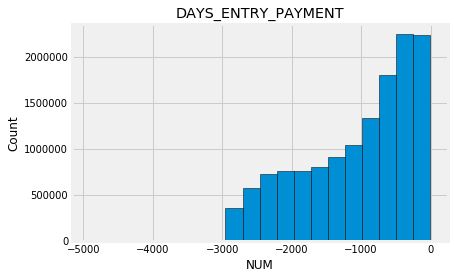

(6.836980507106931e-06, -3000.0)

In [31]:
temp = installments_payments.copy()

temp = temp['DAYS_ENTRY_PAYMENT'].fillna(999)
'''temp = temp[temp.values > -4000]'''
temp = temp[temp.values <= 0]


plt.hist(temp, edgecolor = 'k', bins = 20)
plt.title('DAYS_ENTRY_PAYMENT'); plt.xlabel('NUM'); plt.ylabel('Count');
plt.show()

temp[temp.values < -3000].shape[0]/temp.shape[0], temp[temp.values >= -3000].min()

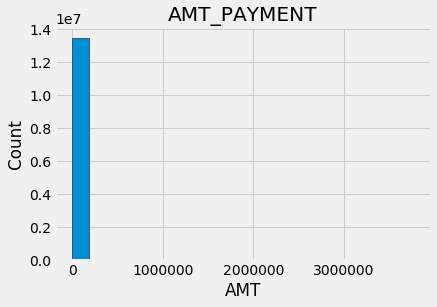

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


237456      2544233.895
803013      2784334.140
860189      3473582.895
999372      2584615.410
1515439     2507880.825
1546640     3065242.455
1649354     2912741.640
1745443     2541938.265
1854253     2620989.180
2190732     3071320.785
3032341     2733612.840
3366817     3371884.155
3493730     3071837.565
3595373     2949993.540
3699714     2786580.270
4455742     3771487.845
5109573     2742996.375
5221576     2898692.370
5248466     3066270.705
5336871     2558800.530
5426815     2874948.840
6364485     3150949.545
6554802     2533614.615
6658683     2627296.110
6986907     3436835.130
7078715     3110086.215
7214927     2753704.935
7214928     2753704.935
7312218     3199045.365
8207133     3116440.260
9119046     3202061.805
9355285     3094108.245
10331676    2744389.980
11311573    2554855.245
11673104    2798275.680
12730671    2860377.165
12966495    2639214.450
13130397    2504589.660
13447389    2651198.130
Name: AMT_PAYMENT, dtype: float64

In [36]:
temp = installments_payments.copy()

temp = temp['AMT_PAYMENT'].fillna(-999)

temp = temp[temp.values >= 0]

plt.hist(temp, edgecolor = 'k', bins = 20)
plt.title('AMT_PAYMENT'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()

installments_payments[installments_payments['AMT_PAYMENT'].values > 2500000]['AMT_PAYMENT']

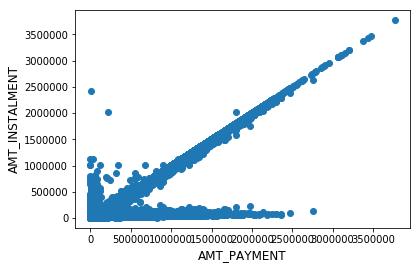

In [64]:
temp = installments_payments.copy()

plt.scatter(temp['AMT_PAYMENT'].fillna(-999).values, temp['AMT_INSTALMENT'].values)
plt.xlabel('AMT_PAYMENT', fontsize=12)
plt.ylabel('AMT_INSTALMENT', fontsize=12)
plt.show()

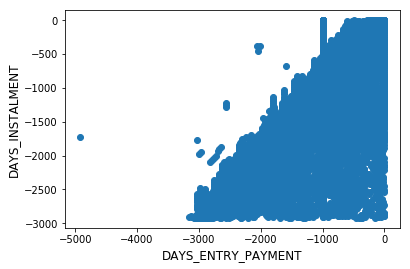

In [67]:
temp = installments_payments.copy()

plt.scatter(temp['DAYS_ENTRY_PAYMENT'].fillna(-999).values, temp['DAYS_INSTALMENT'].values)

plt.xlabel('DAYS_ENTRY_PAYMENT', fontsize=12)
plt.ylabel('DAYS_INSTALMENT', fontsize=12)

plt.show()

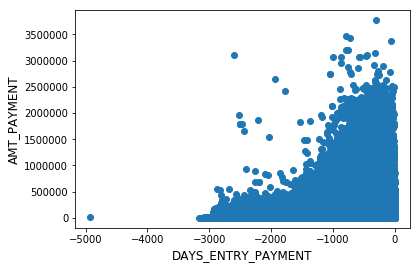

In [68]:
temp = installments_payments.copy()

plt.scatter(temp['DAYS_ENTRY_PAYMENT'].fillna(-999).values, temp['AMT_PAYMENT'].fillna(-999).values)
plt.xlabel('DAYS_ENTRY_PAYMENT', fontsize=12)
plt.ylabel('AMT_PAYMENT', fontsize=12)
plt.show()

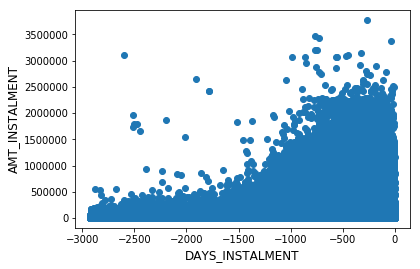

In [69]:
temp = installments_payments.copy()

plt.scatter(temp['DAYS_INSTALMENT'].values, temp['AMT_INSTALMENT'].values)
plt.xlabel('DAYS_INSTALMENT', fontsize=12)
plt.ylabel('AMT_INSTALMENT', fontsize=12)
plt.show()

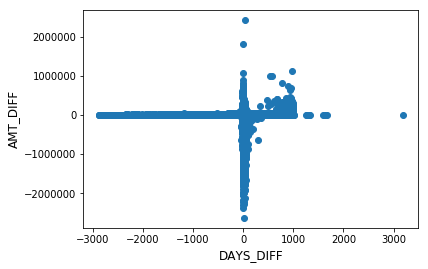

(               0
 11943247  3189.0,                     0
 396593    1804496.850
 3542381   2424726.405
 3794755   1010375.190
 3794805   1006469.235
 5992605   1081089.900
 11489447  1115650.845)

In [42]:
temp = installments_payments.copy()

X = pd.DataFrame(temp['DAYS_INSTALMENT'].values - temp['DAYS_ENTRY_PAYMENT'].fillna(-999).values)
Y = pd.DataFrame(temp['AMT_INSTALMENT'].values - temp['AMT_PAYMENT'].fillna(-999).values)

plt.scatter(X, Y)
plt.xlabel('DAYS_DIFF', fontsize=12)
plt.ylabel('AMT_DIFF', fontsize=12)
plt.show()

X[X.values >2000], Y[Y.values >1000000]

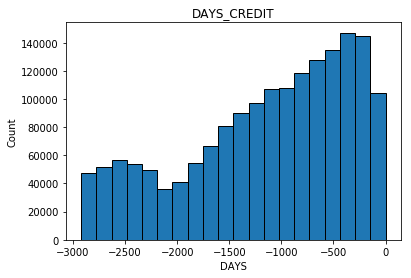

In [5]:
temp = bureau.copy()

plt.hist(temp['DAYS_CREDIT'], edgecolor = 'k', bins = 20)
plt.title('DAYS_CREDIT'); plt.xlabel('DAYS'); plt.ylabel('Count');
plt.show()

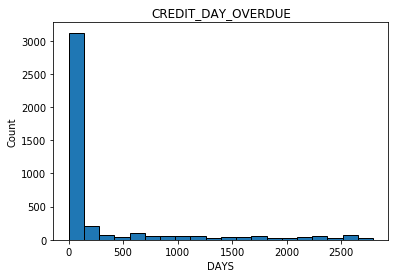

(1716428, 1712211)

In [23]:
temp = bureau.copy() 

temp = temp[temp['CREDIT_DAY_OVERDUE'].values > 0]

plt.hist(temp['CREDIT_DAY_OVERDUE'], edgecolor = 'k', bins = 20)
plt.title('CREDIT_DAY_OVERDUE'); plt.xlabel('DAYS'); plt.ylabel('Count');
plt.show()

bureau.shape[0], bureau[bureau['CREDIT_DAY_OVERDUE'].values == 0]['CREDIT_DAY_OVERDUE'].count()

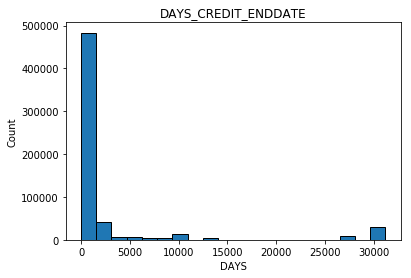

In [25]:
temp = bureau.copy() 

temp = pd.DataFrame(temp['DAYS_CREDIT_ENDDATE'].fillna(-999))
temp = temp[temp['DAYS_CREDIT_ENDDATE'].values > 0]

plt.hist(temp['DAYS_CREDIT_ENDDATE'], edgecolor = 'k', bins = 20)
plt.title('DAYS_CREDIT_ENDDATE'); plt.xlabel('DAYS'); plt.ylabel('Count');
plt.show()

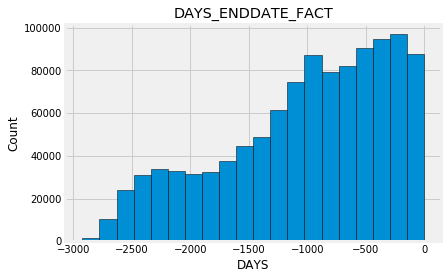

,DAYS_ENDDATE_FACT
198346,-42023.0


In [8]:
temp = bureau.copy() 

temp = pd.DataFrame(temp['DAYS_ENDDATE_FACT'].fillna(999))
temp = temp[temp['DAYS_ENDDATE_FACT'].values <= 0]

plt.hist(temp[temp['DAYS_ENDDATE_FACT'].values > -3000]['DAYS_ENDDATE_FACT'], edgecolor = 'k', bins = 20)
plt.title('DAYS_ENDDATE_FACT'); plt.xlabel('DAYS'); plt.ylabel('Count');
plt.show()
temp[temp['DAYS_ENDDATE_FACT'].values < -3500]

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


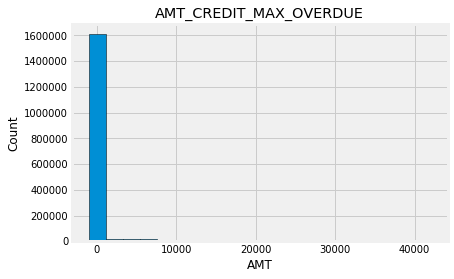

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


,AMT_CREDIT_MAX_OVERDUE
4,77674.500
26,88821.000
289,140631.840
541,133308.810
1483,55230.075
1644,556600.500
1833,59886.000
1840,87354.000
1841,54517.500
1845,52038.000


In [12]:
temp = replace_outliers_by_percentile(bureau, 'AMT_CREDIT_MAX_OVERDUE', 99).fillna(-999)


plt.hist(temp['AMT_CREDIT_MAX_OVERDUE_percentile_replaced'], edgecolor = 'k', bins = 20)
plt.title('AMT_CREDIT_MAX_OVERDUE'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()
pd.DataFrame(bureau[bureau['AMT_CREDIT_MAX_OVERDUE'].values > 40000]['AMT_CREDIT_MAX_OVERDUE'])

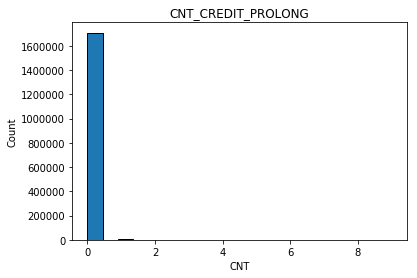

array([0, 2, 1, 4, 3, 5, 9, 8, 6, 7])

In [83]:
temp = bureau.copy() 



plt.hist(temp['CNT_CREDIT_PROLONG'], edgecolor = 'k', bins = 20)
plt.title('CNT_CREDIT_PROLONG'); plt.xlabel('CNT'); plt.ylabel('Count');
plt.show()

temp['CNT_CREDIT_PROLONG'].unique()

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


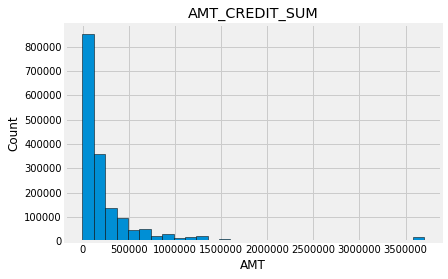

In [24]:
temp = replace_outliers_by_percentile(bureau, 'AMT_CREDIT_SUM', 99).fillna(-999)


plt.hist(temp['AMT_CREDIT_SUM_percentile_replaced'].values, edgecolor = 'k', bins = 30)
plt.title('AMT_CREDIT_SUM'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


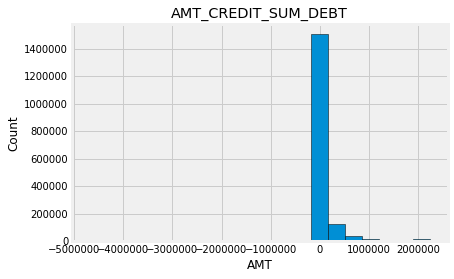

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


0.004904371170826856

In [35]:
temp = replace_outliers_by_percentile(bureau, 'AMT_CREDIT_SUM_DEBT', 99).fillna(-999)
# temp = replace_outliers_by_percentile_negative(temp, 'AMT_CREDIT_SUM_DEBT_percentile_replaced', 1).fillna(-999)


plt.hist(temp['AMT_CREDIT_SUM_DEBT_percentile_replaced'].values, edgecolor = 'k', bins = 20)
plt.title('AMT_CREDIT_SUM_DEBT'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()

pd.DataFrame(bureau[bureau['AMT_CREDIT_SUM_DEBT'].values < 0]['AMT_CREDIT_SUM_DEBT']).shape[0]/bureau.shape[0]

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


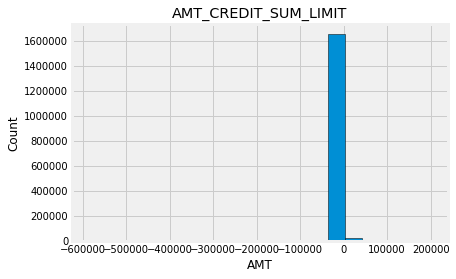

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


351

In [39]:
temp = replace_outliers_by_percentile(bureau, 'AMT_CREDIT_SUM_LIMIT', 99).fillna(-999)


plt.hist(temp['AMT_CREDIT_SUM_LIMIT_percentile_replaced'], edgecolor = 'k', bins = 20)
plt.title('AMT_CREDIT_SUM_LIMIT'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()

bureau[bureau['AMT_CREDIT_SUM_LIMIT'].values < 0].shape[0]

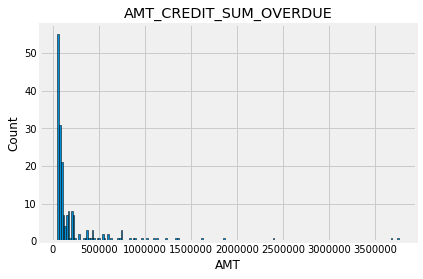

In [86]:
# temp = replace_outliers_by_percentile(bureau, 'AMT_CREDIT_SUM_OVERDUE', 99, True)

# temp = temp[temp['AMT_CREDIT_SUM_OVERDUE_percentile_replaced'].values > 0]

temp = bureau.copy()

temp = temp[temp['AMT_CREDIT_SUM_OVERDUE'].values > 50000]

plt.hist(temp['AMT_CREDIT_SUM_OVERDUE'].values, edgecolor = 'k', bins = 200)
plt.title('AMT_CREDIT_SUM_OVERDUE'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()

# temp['AMT_CREDIT_SUM_OVERDUE_percentile_replaced'].max(), temp[temp['AMT_CREDIT_SUM_OVERDUE_percentile_replaced'].values < temp['AMT_CREDIT_SUM_OVERDUE_percentile_replaced'].max()]['AMT_CREDIT_SUM_OVERDUE_percentile_replaced'].max()

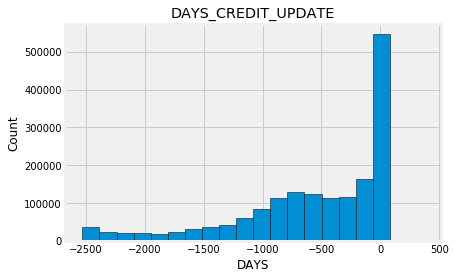

17

In [87]:
temp = replace_outliers_by_percentile_negative(bureau, 'DAYS_CREDIT_UPDATE', 1)

plt.hist(temp['DAYS_CREDIT_UPDATE_percentile_replaced'], edgecolor = 'k', bins = 20)
plt.title('DAYS_CREDIT_UPDATE'); plt.xlabel('DAYS'); plt.ylabel('Count');
plt.show()

pd.DataFrame(bureau[ bureau['DAYS_CREDIT_UPDATE'].values > 0]['DAYS_CREDIT_UPDATE']).shape[0]

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


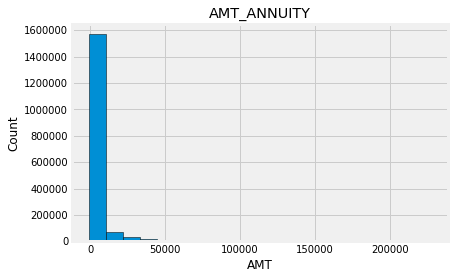

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


,AMT_ANNUITY
588794,57476227.5
607473,118453423.5
639909,27293341.5
639914,27293341.5
650368,59586682.5
719450,42812998.2
831382,43286215.5
834051,24016036.5
992980,31160587.5
1076015,54562657.5


In [94]:

temp = replace_outliers_by_percentile(bureau, 'AMT_ANNUITY', 99, True).fillna(-999)



plt.hist(temp['AMT_ANNUITY_percentile_replaced'], edgecolor = 'k', bins = 20)
plt.title('AMT_ANNUITY'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()

pd.DataFrame(bureau[bureau['AMT_ANNUITY'].values > 20000000]['AMT_ANNUITY'])

In [3]:
df = pd.concat([train,test], axis = 0)
df = df[['SK_ID_CURR']]
credit = credit_card_balance.copy()

# Substraction, ratio, and score_dpd

In [7]:
import pandas as pd
import os
import gc
import numpy as np

def ratio_name(numerator, denominator): return numerator + '_divide_' + denominator

def ratio(df, numerator, denominator):
    return df[numerator] / df[denominator]

def substraction_name(col1, col2): return col1 + '_minus_' + col2

def substraction(df, col1, col2):
    return df[col1] - df[col2]

In [9]:
# Substraction
credit[substraction_name('AMT_CREDIT_LIMIT_ACTUAL', 'AMT_BALANCE')] = \
substraction(credit, 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_BALANCE')

In [10]:
# Ratio
top = ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',\
      'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',\
      'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_CURRENT']

bot = ['AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_CURRENT','AMT_DRAWINGS_CURRENT', \
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_CURRENT',\
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_CURRENT']

In [11]:
# Ratio
for i in range(len(top)):
    print(top[i],bot[i])
    credit[ratio_name(top[i], bot[i])] = \
    ratio(credit, top[i], bot[i])

AMT_DRAWINGS_ATM_CURRENT AMT_DRAWINGS_CURRENT
AMT_DRAWINGS_POS_CURRENT AMT_DRAWINGS_CURRENT
AMT_DRAWINGS_OTHER_CURRENT AMT_DRAWINGS_CURRENT
CNT_DRAWINGS_ATM_CURRENT CNT_DRAWINGS_CURRENT
CNT_DRAWINGS_OTHER_CURRENT CNT_DRAWINGS_CURRENT
CNT_DRAWINGS_POS_CURRENT CNT_DRAWINGS_CURRENT
AMT_DRAWINGS_ATM_CURRENT CNT_DRAWINGS_ATM_CURRENT
AMT_DRAWINGS_POS_CURRENT CNT_DRAWINGS_POS_CURRENT
AMT_DRAWINGS_OTHER_CURRENT CNT_DRAWINGS_OTHER_CURRENT
AMT_DRAWINGS_CURRENT CNT_DRAWINGS_CURRENT


In [12]:
credit['score_DPD'] = 0
credit['score_DPD'] = (credit['SK_DPD']**3 + 5* credit['SK_DPD_DEF']**3 + 1) * (1/(1 + abs(credit['MONTHS_BALANCE']) ))

In [13]:
credit[['score_DPD','SK_DPD','SK_DPD_DEF', 'MONTHS_BALANCE' ]]

,score_DPD,SK_DPD,SK_DPD_DEF,MONTHS_BALANCE
0,0.142857,0,0,-6
1,0.500000,0,0,-1
2,0.125000,0,0,-7
3,0.200000,0,0,-4
4,0.500000,0,0,-1
5,43.000000,7,0,-7
6,0.142857,0,0,-6
7,0.125000,0,0,-7
8,0.200000,0,0,-4
9,0.166667,0,0,-5


In [14]:
col = [i for i in list(credit.columns.values) if credit[i].dtype!= 'object']
print(col)

['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF', 'AMT_CREDIT_LIMIT_ACTUAL_minus_AMT_BALANCE', 'AMT_DRAWINGS_ATM_CURRENT_divide_AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_POS_CURRENT_divide_AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT_divide_AMT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT_divide_CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT_divide_CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_POS_CURRENT_divide_CNT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_ATM_CURRENT_divide_CNT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_POS_CURRENT_divide_CNT_DRAWINGS

# Numerical Columns

In [15]:
numerical_cols = ['SK_DPD', 'SK_DPD_DEF', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'AMT_CREDIT_LIMIT_ACTUAL_minus_AMT_BALANCE', 'AMT_DRAWINGS_ATM_CURRENT_divide_AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_POS_CURRENT_divide_AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT_divide_AMT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT_divide_CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT_divide_CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_POS_CURRENT_divide_CNT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_ATM_CURRENT_divide_CNT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_POS_CURRENT_divide_CNT_DRAWINGS_POS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT_divide_CNT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_CURRENT_divide_CNT_DRAWINGS_CURRENT', 'score_DPD']

In [16]:
numerical_len = len(numerical_cols)
extrafunc_list = [_ for _ in range(len(numerical_cols))]
for i in range(len(numerical_cols)):
    if i == 0 or i == 1:
        extrafunc_list[i] = ['positive_count']
    else:
        if i == 2:
            extrafunc_list[i] = ['positive_count', 'negative_count']
        else:
            extrafunc_list[i] = None
print(extrafunc_list)

[['positive_count'], ['positive_count'], ['positive_count', 'negative_count'], None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [17]:
def numerical_agg(df, gp_col, agg_col, df_name, extrafunc_list = None):
    
    agg_list = ['max', 'min', 'std','mean']
    '''
    Possible extrafunc_list: ['sum','median','two_minus_one_third','positive_count', 'negative_count','standard_error', 'trimmed_mean_10_pct', 'trimmed_mean_25_pct','normed_std', 'max_minus_min','one_third','two_third']
    '''
    if extrafunc_list:
        if 'one_third' in extrafunc_list:
            def one_third(series):
                return series.quantile(1/3)
            
        if 'two_third' in extrafunc_list:
            def two_third(series):
                return series.quantile(2/3)
            
        if 'max_minus_min' in extrafunc_list:
            def max_minus_min(series):
                return (series.max() - series.min())
        
        if 'two_minus_one_third' in extrafunc_list:
#             print('two_minus_one')
#             print('get two minus one')
            def two_minus_one_third(series):
                return(series.quantile(0.66666) - series.quantile(0.33333))
       
        if 'positive_count' in extrafunc_list:
#             print('get positive count')
            def positive_count(series):
                return pd.Series(series > 0).sum()

        if 'negative_count' in extrafunc_list:
#             print('get negative count')
            def negative_count(series):
                return pd.Series(series < 0).sum()

        if 'standard_error' in extrafunc_list:
#             print('get std-error')
            def standard_error(series):
                return series.std()/np.sqrt(len(series))

        if 'normed_std' in extrafunc_list:
#             print('get normed_std')
            def normed_std(series):
                return series.std()/series.mean()

        if 'trimmed_mean_10_pct' in extrafunc_list:
#             print('get_trimmed 10 pct')
            def trimmed_mean_10_pct(series):
                return stats.trim_mean(series.dropna(), 0.1)

        if 'trimmed_mean_25_pct' in extrafunc_list:
#             print('get_trimmed 25 pct')
            def trimmed_mean_25_pct(series):
                return stats.trim_mean(series.dropna(), 0.25)
        
        list_tocall = []
        for i in extrafunc_list:
            if i not in set(['sum', 'median']):
                list_tocall.append(eval(i))
            
    if extrafunc_list != None:   
        agg_list.extend(list_tocall)
    
    _df = df.groupby(gp_col).agg({agg_col:agg_list})
    columns = []
    for pre in _df.columns.levels[0]:
        for middle in _df.columns.levels[1]:
            columns.append('%s_%s_%s' %(df_name,pre,middle))
    _df.columns = columns
    
    return _df.reset_index()

In [20]:
gp_col = 'SK_ID_CURR'
for i in range(len(extrafunc_list)):
    print(numerical_cols[i])
    df = df.merge(numerical_agg(credit, gp_col, numerical_cols[i], 'credit_card', extrafunc_list = extrafunc_list[i]), on = 'SK_ID_CURR', how='left')

SK_DPD
SK_DPD_DEF
AMT_BALANCE
AMT_CREDIT_LIMIT_ACTUAL
AMT_DRAWINGS_ATM_CURRENT
AMT_DRAWINGS_CURRENT
AMT_DRAWINGS_OTHER_CURRENT
AMT_DRAWINGS_POS_CURRENT
AMT_INST_MIN_REGULARITY
AMT_PAYMENT_CURRENT
AMT_PAYMENT_TOTAL_CURRENT
AMT_RECEIVABLE_PRINCIPAL
AMT_RECIVABLE
AMT_TOTAL_RECEIVABLE
CNT_DRAWINGS_ATM_CURRENT
CNT_DRAWINGS_CURRENT
CNT_DRAWINGS_OTHER_CURRENT
CNT_DRAWINGS_POS_CURRENT
CNT_INSTALMENT_MATURE_CUM
AMT_CREDIT_LIMIT_ACTUAL_minus_AMT_BALANCE
AMT_DRAWINGS_ATM_CURRENT_divide_AMT_DRAWINGS_CURRENT
AMT_DRAWINGS_POS_CURRENT_divide_AMT_DRAWINGS_CURRENT
AMT_DRAWINGS_OTHER_CURRENT_divide_AMT_DRAWINGS_CURRENT
CNT_DRAWINGS_ATM_CURRENT_divide_CNT_DRAWINGS_CURRENT
CNT_DRAWINGS_OTHER_CURRENT_divide_CNT_DRAWINGS_CURRENT
CNT_DRAWINGS_POS_CURRENT_divide_CNT_DRAWINGS_CURRENT
AMT_DRAWINGS_ATM_CURRENT_divide_CNT_DRAWINGS_ATM_CURRENT
AMT_DRAWINGS_POS_CURRENT_divide_CNT_DRAWINGS_POS_CURRENT
AMT_DRAWINGS_OTHER_CURRENT_divide_CNT_DRAWINGS_OTHER_CURRENT
AMT_DRAWINGS_CURRENT_divide_CNT_DRAWINGS_CURRENT
score_

# Categorical

In [21]:
def _set_type(series, dtype):
    _max, _min = max(series), min(series)
    if dtype == 'uint':
        if _max <= 255: return np.uint8
        elif _max <= 65535: return np.uint16
        elif _max <= 4294967295: return np.uint32
        else: return np.uint64
    elif dtype == 'int':
        if _min >= -128 and _max <= 127: return np.int8
        elif _min >=-32768 and _max <= 32767: return np.int16
        elif _min >= -2147483648 and _max <= 2147483647: return np.int32
        else: return np.int64
    elif dtype == 'float':
        if max(abs(_min), _max) <= 3.4028235e+38: return np.float32
        else: return np.float64

def split_categorical_feature(df, group_col, calc_col):
    tmp_df = pd.concat([df[group_col], pd.get_dummies(df[calc_col], prefix=calc_col)], axis=1).groupby(by=group_col).sum().reset_index()
    dtype = {x: _set_type(tmp_df[x], 'uint') for x in tmp_df.columns if x != group_col}
    for x in tmp_df:
        if x in df.columns:
            dtype[x] = df[x].dtype
    return tmp_df.astype(dtype)

In [22]:
categorical_cols = ['NAME_CONTRACT_STATUS']

for x in categorical_cols:
    print(x)
    df = df.merge(split_categorical_feature(credit, 'SK_ID_CURR', x), on='SK_ID_CURR', how='left')
    gc.collect()

NAME_CONTRACT_STATUS


# Months Balance max min and sum

In [23]:
_df = credit.groupby('SK_ID_CURR').agg({'MONTHS_BALANCE':['sum','min','max']})
columns = []
for pre in _df.columns.levels[0]:
    for middle in _df.columns.levels[1]:
        columns.append('%s_%s_%s' %('credit_card',pre,middle))
_df.columns = columns
df = df.merge(_df.reset_index(), on = 'SK_ID_CURR', how='left')

In [26]:
print(df.columns.values, len(df.columns.values))

['SK_ID_CURR' 'credit_card_SK_DPD_max_x' 'credit_card_SK_DPD_min_x'
 'credit_card_SK_DPD_std_x' 'credit_card_SK_DPD_mean_x'
 'credit_card_SK_DPD_positive_count_x' 'credit_card_SK_DPD_DEF_max_x'
 'credit_card_SK_DPD_DEF_min_x' 'credit_card_SK_DPD_DEF_std_x'
 'credit_card_SK_DPD_DEF_mean_x' 'credit_card_SK_DPD_DEF_positive_count_x'
 'credit_card_SK_DPD_max_y' 'credit_card_SK_DPD_min_y'
 'credit_card_SK_DPD_std_y' 'credit_card_SK_DPD_mean_y'
 'credit_card_SK_DPD_positive_count_y' 'credit_card_SK_DPD_DEF_max_y'
 'credit_card_SK_DPD_DEF_min_y' 'credit_card_SK_DPD_DEF_std_y'
 'credit_card_SK_DPD_DEF_mean_y' 'credit_card_SK_DPD_DEF_positive_count_y'
 'credit_card_AMT_BALANCE_max' 'credit_card_AMT_BALANCE_min'
 'credit_card_AMT_BALANCE_std' 'credit_card_AMT_BALANCE_mean'
 'credit_card_AMT_BALANCE_positive_count'
 'credit_card_AMT_BALANCE_negative_count'
 'credit_card_AMT_CREDIT_LIMIT_ACTUAL_max'
 'credit_card_AMT_CREDIT_LIMIT_ACTUAL_min'
 'credit_card_AMT_CREDIT_LIMIT_ACTUAL_std'
 'credit_card